# 라이브러리 다운로드

In [ ]:
!pip install datasets
!pip install kss

# 라이브러리 불러오기

In [ ]:
import zipfile
from datasets import load_from_disk, load_dataset
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import kss
import json
import re

# 압축 해제

In [ ]:
f = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/data.zip')
f.extractall()
f.close()

# Abstract

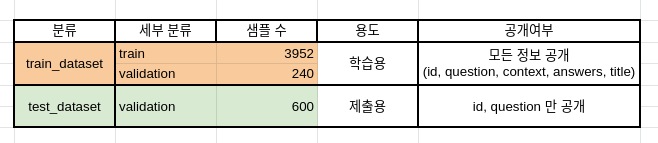

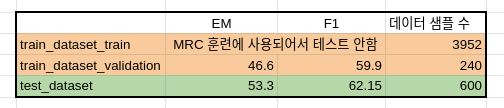

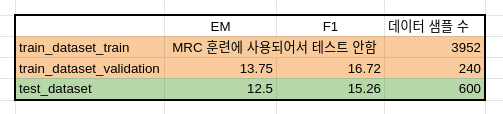

# Train

## 데이터 불러오기

In [ ]:
train_dataset = load_from_disk('/content/data/train_dataset/train')
print(train_dataset)

Dataset({
    features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
    num_rows: 3952
})


## Title

In [ ]:
train_title_len = [len(i) for i in train_dataset['title']]

In [ ]:
pd.DataFrame(train_title_len).describe()

,0
count,3952.000000
mean,7.511387
std,4.823314
min,1.000000
25%,4.000000
50%,6.000000
75%,9.000000
max,57.000000


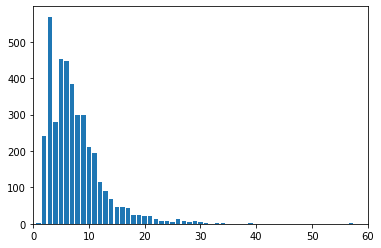

In [ ]:
plt.bar(Counter(train_title_len).keys(),Counter(train_title_len).values())
plt.xlim(0,60)
plt.show()

## Context

### Charater

In [ ]:
train_context_character_len = [len(i.replace('\\n\\n',' ')) for i in train_dataset['context']]

In [ ]:
pd.DataFrame(train_context_character_len).describe()

,0
count,3952.000000
mean,912.295547
std,353.542469
min,510.000000
25%,640.000000
50%,813.000000
75%,1090.000000
max,2049.000000


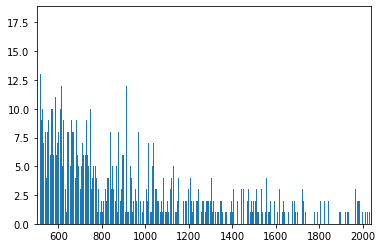

In [ ]:
plt.bar(Counter(train_context_character_len).keys(),Counter(train_context_character_len).values())
plt.xlim(500,2040)
plt.show()

### Sentence

In [ ]:
train_context_sentence_len = [len(kss.split_sentences(i.replace('\\n\\n',' '))) for i in train_dataset['context']]

In [ ]:
pd.DataFrame(train_context_sentence_len).describe()

,0
count,3952.000000
mean,12.821356
std,5.766130
min,1.000000
25%,9.000000
50%,12.000000
75%,16.000000
max,56.000000


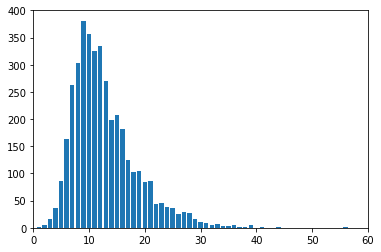

In [ ]:
plt.bar(Counter(train_context_sentence_len).keys(),Counter(train_context_sentence_len).values())
plt.xlim(0,60)
plt.show()

## Question

In [ ]:
train_question_len = [len(i) for i in train_dataset['question']]

In [ ]:
pd.DataFrame(train_question_len).describe()

,0
count,3952.000000
mean,29.322368
std,8.727421
min,8.000000
25%,23.000000
50%,29.000000
75%,35.000000
max,78.000000


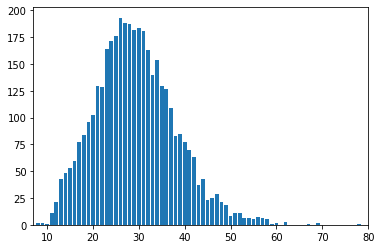

In [ ]:
plt.bar(Counter(train_question_len).keys(),Counter(train_question_len).values())
plt.xlim(7,80)
plt.show()

## Answers

In [ ]:
train_answer_len = [len(i['text'][0]) for i in train_dataset['answers']]

In [ ]:
pd.DataFrame(train_answer_len).describe()

,0
count,3952.000000
mean,6.275051
std,5.346842
min,1.000000
25%,3.000000
50%,5.000000
75%,8.000000
max,83.000000


In [ ]:
pd.DataFrame(train_answer_len).describe(percentiles = [0.75,0.8,0.9,0.95,0.99])

,0
count,3952.000000
mean,6.275051
std,5.346842
min,1.000000
50%,5.000000
75%,8.000000
80%,8.000000
90%,12.000000
95%,15.000000
99%,27.000000


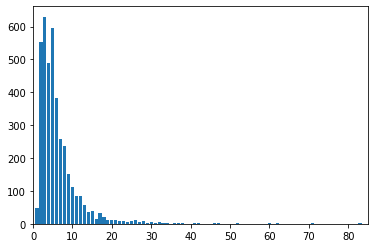

In [ ]:
plt.bar(Counter(train_answer_len).keys(),Counter(train_answer_len).values())
plt.xlim(0,85)
plt.show()

## Total

In [ ]:
train_total = np.array(train_title_len) + np.array(train_context_character_len) + np.array(train_question_len) + np.array(train_answer_len)

In [ ]:
pd.DataFrame(train_total).describe()

,0
count,3952.000000
mean,955.404352
std,354.039138
min,531.000000
25%,683.000000
50%,854.000000
75%,1134.000000
max,2105.000000


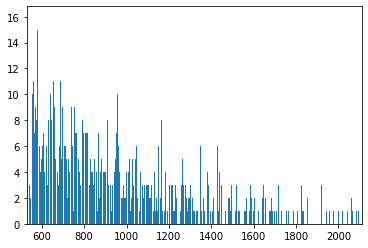

In [ ]:
plt.bar(Counter(train_total).keys(),Counter(train_total).values())
plt.xlim(530,2110)
plt.show()

# Validation

## 데이터 불러오기

In [ ]:
validation_dataset = load_from_disk('/content/data/train_dataset/validation')
print(validation_dataset)

Dataset({
    features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
    num_rows: 240
})


## Title

In [ ]:
validation_title_len = [len(i) for i in validation_dataset['title']]

In [ ]:
pd.DataFrame(validation_title_len).describe()

,0
count,240.000000
mean,7.266667
std,4.389476
min,2.000000
25%,4.000000
50%,6.000000
75%,9.000000
max,34.000000


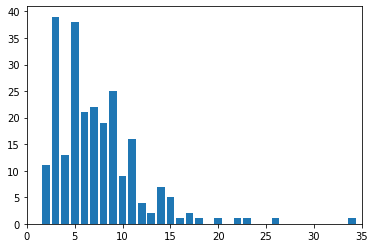

In [ ]:
plt.bar(Counter(validation_title_len).keys(),Counter(validation_title_len).values())
plt.xlim(0,35)
plt.show()

## Context

### Charater

In [ ]:
validation_context_character_len = [len(i.replace('\\n\\n',' ')) for i in validation_dataset['context']]

In [ ]:
pd.DataFrame(validation_context_character_len).describe()

,0
count,240.000000
mean,909.125000
std,357.042619
min,508.000000
25%,613.750000
50%,813.000000
75%,1098.000000
max,2034.000000


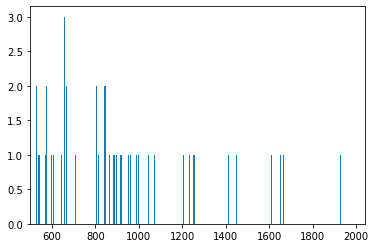

In [ ]:
plt.bar(Counter(validation_context_character_len).keys(),Counter(validation_context_character_len).values())
plt.xlim(500,2040)
plt.show()

### Sentence

In [ ]:
validation_context_sentence_len = [len(kss.split_sentences(i.replace('\\n\\n',' '))) for i in validation_dataset['context']]

In [ ]:
pd.DataFrame(validation_context_sentence_len).describe()

,0
count,240.000000
mean,12.891667
std,5.870707
min,2.000000
25%,9.000000
50%,12.000000
75%,16.000000
max,37.000000


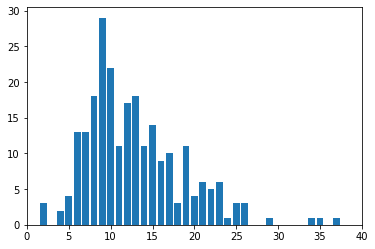

In [ ]:
plt.bar(Counter(validation_context_sentence_len).keys(),Counter(validation_context_sentence_len).values())
plt.xlim(0,40)
plt.show()

## Question

In [ ]:
validation_question_len = [len(i) for i in validation_dataset['question']]

In [ ]:
pd.DataFrame(validation_question_len).describe()

,0
count,240.000000
mean,29.195833
std,8.728301
min,9.000000
25%,23.000000
50%,29.000000
75%,35.000000
max,59.000000


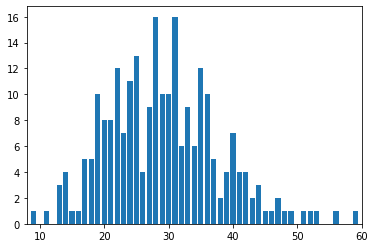

In [ ]:
plt.bar(Counter(validation_question_len).keys(),Counter(validation_question_len).values())
plt.xlim(8,60)
plt.show()

## Answers

In [ ]:
validation_answer_len = [len(i['text'][0]) for i in validation_dataset['answers']]

In [ ]:
pd.DataFrame(validation_answer_len).describe()

,0
count,240.000000
mean,6.912500
std,6.858755
min,1.000000
25%,3.000000
50%,5.000000
75%,8.000000
max,64.000000


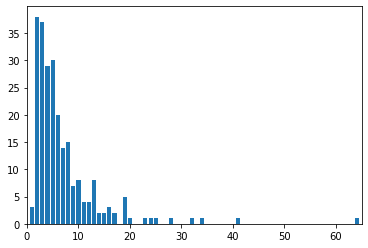

In [ ]:
plt.bar(Counter(validation_answer_len).keys(),Counter(validation_answer_len).values())
plt.xlim(0,65)
plt.show()

## Total

In [ ]:
validation_total = np.array(validation_title_len) + np.array(validation_context_character_len) + np.array(validation_question_len) + np.array(validation_answer_len)

In [ ]:
pd.DataFrame(validation_total).describe()

,0
count,240.000000
mean,952.500000
std,356.354156
min,540.000000
25%,654.750000
50%,861.000000
75%,1140.000000
max,2068.000000


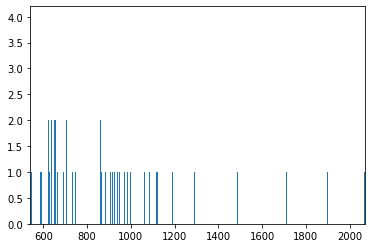

In [ ]:
plt.bar(Counter(validation_total).keys(),Counter(validation_total).values())
plt.xlim(540,2070)
plt.show()

# Test

## 데이터 불러오기

In [ ]:
test_dataset = load_from_disk('/content/data/test_dataset/validation')
print(test_dataset)

Dataset({
    features: ['id', 'question'],
    num_rows: 600
})


## Question

In [ ]:
test_question_len = [len(i) for i in test_dataset['question']]

In [ ]:
pd.DataFrame(test_question_len).describe()

,0
count,600.000000
mean,29.555000
std,8.962376
min,8.000000
25%,23.000000
50%,29.000000
75%,35.000000
max,62.000000


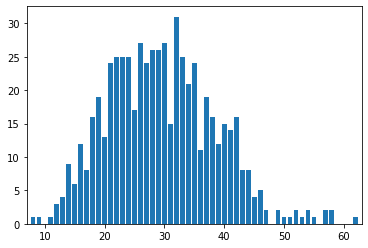

In [ ]:
plt.bar(Counter(test_question_len).keys(),Counter(test_question_len).values())
plt.xlim(7,63)
plt.show()

# Wikipedia

In [ ]:
with open('/content/data/wikipedia_documents.json', 'r') as f:
    wiki_data = pd.DataFrame(json.load(f)).transpose()

In [ ]:
wiki_data

,text,corpus_source,url,domain,title,author,html,document_id
0,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...",위키피디아,TODO,None,나라 목록,None,None,0
1,이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...,위키피디아,TODO,None,나라 목록,None,None,1
2,현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...,위키피디아,TODO,None,백남준,None,None,2
3,"아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...",위키피디아,TODO,None,아오조라 문고,None,None,3
4,저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...,위키피디아,TODO,None,아오조라 문고,None,None,4
...,...,...,...,...,...,...,...,...
60608,"오키나와 현립 박물관·미술관( , Okinawa Prefectural Museum ...",위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60608
60609,"1936년 7월, 오키나와현 교육위원회 부설 향토 박물관(沖縄県教育会附設郷土博物館)...",위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60609
60610,박물관은 개관 10주년이되는 2017년에 관의 애칭 및 마스코트를 일반인에게 공모했...,위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60610
60611,단결권 및 단체교섭권 협약(Right to Organise and Collectiv...,위키피디아,None,None,단결권 및 단체교섭권 협약,None,None,60611


In [ ]:
wiki_data = wiki_data.drop_duplicates(['text']) # 3876

wiki_data = wiki_data.reset_index()

del wiki_data['index']

In [ ]:
wiki_data

,text,corpus_source,url,domain,title,author,html,document_id
0,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...",위키피디아,TODO,None,나라 목록,None,None,0
1,이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...,위키피디아,TODO,None,나라 목록,None,None,1
2,현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...,위키피디아,TODO,None,백남준,None,None,2
3,"아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...",위키피디아,TODO,None,아오조라 문고,None,None,3
4,저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...,위키피디아,TODO,None,아오조라 문고,None,None,4
...,...,...,...,...,...,...,...,...
56732,"오키나와 현립 박물관·미술관( , Okinawa Prefectural Museum ...",위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60608
56733,"1936년 7월, 오키나와현 교육위원회 부설 향토 박물관(沖縄県教育会附設郷土博物館)...",위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60609
56734,박물관은 개관 10주년이되는 2017년에 관의 애칭 및 마스코트를 일반인에게 공모했...,위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60610
56735,단결권 및 단체교섭권 협약(Right to Organise and Collectiv...,위키피디아,None,None,단결권 및 단체교섭권 협약,None,None,60611


In [ ]:
wiki_data['len'] = [len(i) for i in wiki_data['text']]

In [ ]:
wiki_data['len'].describe()

count    56737.000000
mean       750.820593
std        698.576330
min        184.000000
25%        416.000000
50%        578.000000
75%        856.000000
max      46099.000000
Name: len, dtype: float64

In [ ]:
wiki_data['len'].describe([0.8,0.9,0.95,0.99])

count    56737.000000
mean       750.820593
std        698.576330
min        184.000000
50%        578.000000
80%        950.000000
90%       1293.000000
95%       1715.000000
99%       3074.920000
max      46099.000000
Name: len, dtype: float64

In [ ]:
sorted(set(wiki_data['len'].to_list()),reverse=True)[:500]

# KorQuAD 1.0

In [ ]:
dataset = load_dataset('squad_kor_v1')

In [ ]:
korquad_context_character_len = [len(i.replace('\\n\\n',' ')) for i in set(dataset['train']['context'])]

In [ ]:
pd.DataFrame(korquad_context_character_len).describe()

,0
count,9606.000000
mean,516.765771
std,209.474178
min,348.000000
25%,395.000000
50%,460.000000
75%,569.750000
max,10012.000000


In [ ]:
pd.DataFrame(korquad_context_character_len).describe([0.8,0.9,0.95,0.99])

,0
count,9606.000000
mean,516.765771
std,209.474178
min,348.000000
50%,460.000000
80%,608.000000
90%,728.500000
95%,855.750000
99%,1210.850000
max,10012.000000


In [ ]:
sorted(korquad_context_character_len,reverse=True)

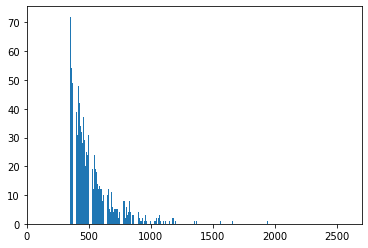

In [ ]:
plt.bar(Counter(korquad_context_character_len).keys(),Counter(korquad_context_character_len).values())
plt.xlim(0,2700)
plt.show()

# KorQuAD 2.0

In [ ]:
dataset = load_dataset('squad_kor_v2')

In [ ]:
korquad_context_character_len = [len(i.replace('\\n\\n',' ')) for i in set(dataset['train']['context'])]

In [ ]:
pd.DataFrame(korquad_context_character_len).describe()

,0
count,38486.000000
mean,19804.538611
std,19823.084986
min,3876.000000
25%,9476.000000
50%,14263.000000
75%,22682.000000
max,690832.000000


In [ ]:
pd.DataFrame(korquad_context_character_len).describe([0.8,0.9,0.95,0.99])

,0
count,38486.000000
mean,19804.538611
std,19823.084986
min,3876.000000
50%,14263.000000
80%,25813.000000
90%,37231.000000
95%,51345.250000
99%,95181.550000
max,690832.000000


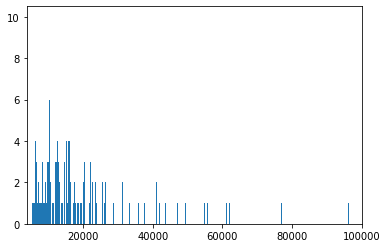

In [ ]:
plt.bar(Counter(korquad_context_character_len).keys(),Counter(korquad_context_character_len).values())
plt.xlim(3800,100000)
plt.show()